# Dozer

![](schema_dozer.png)

## Equations de liaison

Le équations de liaison sont données par les conditions $\hspace{0.5cm} \overrightarrow{C_{31}C_5}=\vec{0} \hspace{0.5cm}$ et $\hspace{0.5cm} \overrightarrow{C_{41}C_5}=\vec{0}$

Ce qui conduit au système  : $\hspace{0.5cm} \begin{cases} f_1(z)=\delta cos(\psi_3)-(d-a)cos(\psi_2)-bsin(\psi_5)=0 \\ f_2(z)=\delta sin(\psi_3)-(d-a)sin(\psi_2)+bcos(\psi_5)=0 \\ f_3(z)=\lambda sin(\psi_4)-dcos(\psi_2)-bsin(\psi_5)+X_B = 0 \\ f_4(z)=\lambda cos(\psi_4)+dsin(\psi_2)-bcos(\psi_5)+Z_B = 0  \end{cases} \hspace{0.5cm} $ avec $ \hspace{0.5cm} z=(\delta, \lambda, \psi_1, \psi_2, \psi_3, \psi_4, \psi_5) $

Ce mécanisme est donc de mobilité deux, il est piloté par les paramètres d'extension des vérins : $ \hspace{0.5cm} (\delta > 0 \hspace{0.1cm}, \hspace{0.1cm} \lambda < 0) \hspace{0.5cm} $

In [2]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from numpy.linalg import inv, norm
from scipy.integrate import solve_ivp
from matplotlib import transforms

## Données géométriques

In [3]:
# Dimensions (en m) 
a = 3.0; d = 4.5; b = 0.75; XB = 3.75; ZB = 2.0

## E1 - Position de référence

Cette position est définie par les angles $\psi_{20}$ et $\psi_{50}$ qui définissent l'orientation du bras $ S_2 $ et de la lame $ S_5 $, ils sont égaux à :

$ \hspace{0.5cm} \psi_{20} = 0 \hspace{0.1cm} deg \hspace{0.5cm} $ et $ \hspace{0.5cm} \psi_{50} = -10 \hspace{0.1cm} deg $

A partir de ces valeurs, nous allons rechercher les valeurs de référence (ou initiales) des autres paramètres, à savoir : 

$ \hspace{0.5cm} \delta_0  \hspace{0.5cm} \lambda_0 \hspace{0.5cm} \psi_{30} \hspace{0.5cm}$ et $\hspace{0.5cm} \psi_{40}  $



#### Résolution du système d'équations de liaison dans ce contexte

In [4]:
# position de référence imposée
psi20_deg = 0; psi20 = np.radians(psi20_deg); psi50_deg = -10; psi50 = np.radians(psi50_deg)
#
# valeurs initiales estimées des autres paramètres pour débuter la résolution par Newton-Raphson
z = np.array([a, -a, 0, 0])
# affectation de variables pour la résolution afin que les fonctions conservent l'expression formelle donnée en introduction
Delta0 = z[0]; Lambda0 = z[1]; psi30 = z[2]; psi40 = z[3]
#
# initialisation de l'écart pour le test de convergence
ecart=1
#
# résolution par Newton-Raphson
while ecart > 1e-8 :
# définition de la valeur courante des fonctions du système à résoudre
        f1 = Delta0*np.cos(psi30) - (d-a)*np.cos(psi20) - b*np.sin(psi50)
        f2 = Delta0*np.sin(psi30) - (d-a)*np.sin(psi20) + b*np.cos(psi50)
        f3 = Lambda0*np.sin(psi40) - d*np.cos(psi20) - b*np.sin(psi50) + XB
        f4 = Lambda0*np.cos(psi40) + d*np.sin(psi20) - b*np.cos(psi50) + ZB
        f=np.array([f1,f2,f3,f4])
# définition de la matrice Jacobienne analytique analytique
        J1 = np.array([np.cos(psi30), 0, - Delta0*np.sin(psi30), 0])
        J2 = np.array([np.sin(psi30), 0, Delta0*np.cos(psi30), 0])
        J3 = np.array([0, np.sin(psi40), 0, Lambda0*np.cos(psi40)])
        J4 = np.array([0, np.cos(psi40), 0, -Lambda0*np.sin(psi40)])
        J = np.array([J1,J2,J3,J4])
#  calcul de l'accroissement et de la nouvelle solution
        dz = -np.linalg.inv(J)@f
        z += dz
        ecart = np.linalg.norm(dz)
        Delta0 = z[0]; Lambda0 = z[1]; psi30 = z[2]; psi40 = z[3]
# fin boucle while
# 
# affichage de la position initiale obtenue
#
# longueurs
affichage_long = "Delta0 et Lambda0 sont égaux à :\n{:8} = {:6.2f} m \n{:8} = {:6.2f} m"
print(affichage_long.format('Delta0', Delta0,'Lambda0', Lambda0))
#
# angles
angles = {"psi20" : psi20, "psi30" : psi30, "psi40": psi40, "psi50" : psi50}
affichage_angles = "{:8} = {:6.2f} radians  et {:6.1f} degrés"
print("\nles angles d'orientation des pièces sont égaux à :")
for angle_nom, angle_val in angles.items():
    print(affichage_angles.format(angle_nom , angle_val , np.degrees(angle_val)))

Delta0 et Lambda0 sont égaux à :
Delta0   =   1.56 m 
Lambda0  =  -1.41 m

les angles d'orientation des pièces sont égaux à :
psi20    =   0.00 radians  et    0.0 degrés
psi30    =  -0.49 radians  et  -28.3 degrés
psi40    =  -0.46 radians  et  -26.2 degrés
psi50    =  -0.17 radians  et  -10.0 degrés


#### Tracé de la position initiale du mécanisme 

Text(-5.0, -0.3, 'D')

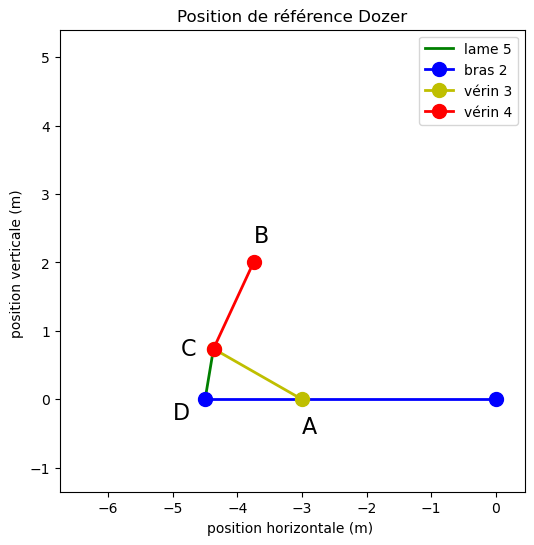

In [6]:
# positions (x,z) dans le repère R1 des points caractéristiques 
XO2 = 0; ZO2 = 0
XA0 = a*np.cos(psi20); ZA0 = -a*np.sin(psi20)
XD0 = d*np.cos(psi20); ZD0 = -d*np.sin(psi20)
XC0 = a*np.cos(psi20) + Delta0*np.cos(psi30); ZC0 = -a*np.sin(psi20) - Delta0*np.sin(psi30)
#
# tracé de la position de référence dans la figure fig_ref
fig_ref = plt.figure(figsize=(6, 6))
ax = fig_ref.add_subplot(autoscale_on=False, xlim = (-1.5*d,0.1*d), ylim = (-0.3*d,1.2*d))
#
ax.plot([-XD0,-XC0],[ZD0,ZC0],'g-', lw=2, label = 'lame 5')
ax.plot([XO2,-XD0],[ZO2,ZD0],'b-',marker='o', lw=2, ms=10, label = 'bras 2')
ax.plot([-XA0,-XC0],[ZA0,ZC0],'y-',marker='o', lw=2, ms=10, label = 'vérin 3')
ax.plot([-XB,-XC0],[ZB,ZC0],'r-',marker='o', lw=2, ms=10, label = 'vérin 4')
#
ax.set_xlabel('position horizontale (m) ')
ax.set_ylabel('position verticale (m) ')
ax.set_title('Position de référence Dozer')
ax.legend()
#
ax.text(-XA0, ZA0-0.5, 'A', color = 'black', fontsize =16)
ax.text(-XB, ZB+0.3, 'B', color = 'black', fontsize =16)
ax.text(-XC0-0.5, ZC0-0.1, 'C', color = 'black', fontsize =16)
ax.text(-XD0-0.5, ZD0-0.3, 'D', color = 'black', fontsize =16)

## E2 - Analyse du fonctionnement pour une vitesse de sortie constante des vérins

#### Extensions max / min - Vitesses des vérins - Temps de simulation

In [7]:
# Extensions limites de vérins (en m)
delta_min = 1.1; delta_max = 2.1; lambda_min = -2.5; lambda_max = -1.0
#
# Vitesses de sortie des tiges des vérins (en m/s avec Vd pour le vérin 3 et Vl pour le vérin 4) 

Vd = 4.0e-2; Vl = 4.0e-2

#
# Temps de simulation initial t0, final tf et pas de temps dt (en s) pour ninc points de simulation. 
t0 = 0.0; tf = 25.0; ninc = 250; dt=(tf-t0)/(ninc-1)


#### Résolution du système d'équation de liaison 

In [8]:
# initialisation d'un tableau pour stocker les positions successives du mécanisme
sol = np.zeros((ninc,7))
#
# initialisation du vecteur inconnu z = [??] à 
z = np.array([psi20, psi30, psi40, psi50])
# affectation de variables pour la résolution afin que les fonctions conservent l'expression formelle donnée en introduction
psi2 = z[0]; psi3 = z[1]; psi4 = z[2]; psi5 = z[3]
#
# initialisations des temps et des indices d'arrivée en butée 
td = 0; tl = 0; nd = 0; nl = 0
#
# intialisation des paramètres d'arrivée en butée 
butee_3 = "pas d'arrivée en butée"
butee_4 = "pas d'arrivée en butée"
#
# parcours du temps pour simuler le fonctionnement 
for j in range(ninc):
# t courant
    t = t0 + j*dt
# position courante des vérin, lambda étant une variable réservée en python nous avons ajouté un "_c" à lambda et delta
    delta_c = Vd*t + Delta0
    lambda_c = Vl*t + Lambda0
# test de l'arrivée en butée des vérins et sauvegarde, le cas échéant, du temps et de l'indice associé 
    if delta_c < delta_min:
        delta_c = delta_min
        if td == 0: td=t; nd=j; butee_3 = 'extension minimale'
    if delta_c > delta_max :
        delta_c = delta_max
        if td == 0: td=t; nd=j; butee_3 = 'extension maximale'
    if lambda_c < lambda_min :
        lambda_c = lambda_min  
        if tl == 0: tl=t; nl=j; butee_4 = 'extension minimale'
    if lambda_c > lambda_max :
        lambda_c = lambda_max
        if tl == 0: tl=t; nl=j; butee_4 = 'extension maximale'
#
# initialisation de l'écart du test de convergence de la boucle de Newton / Raphson
    ecart = 1
#
# boucle de résolution Newton-Raphson
    while ecart > 1e-8: 
    # définition des valeurs courantes de fonctions du système à résoudre 
        f1 = delta_c*np.cos(psi3) - (d-a)*np.cos(psi2) - b*np.sin(psi5)
        f2 = delta_c*np.sin(psi3) - (d-a)*np.sin(psi2) + b*np.cos(psi5)
        f3 = lambda_c*np.sin(psi4) - d*np.cos(psi2) - b*np.sin(psi5) + XB
        f4 = lambda_c*np.cos(psi4) + d*np.sin(psi2) - b*np.cos(psi5) + ZB
        f=np.array([f1,f2,f3,f4])
# calcul de la matrice Jacobienne
        J1 = np.array([(d-a)*np.sin(psi2), -delta_c*np.sin(psi3), 0, -b*np.cos(psi5)])
        J2 = np.array([(a-d)*np.cos(psi2), delta_c*np.cos(psi3), 0, -b*np.sin(psi5)])
        J3 = np.array([d*np.sin(psi2), 0, lambda_c*np.cos(psi4), -b*np.cos(psi5)])
        J4 = np.array([d*np.cos(psi2), 0, -lambda_c*np.sin(psi4), b*np.sin(psi5)])
        J = np.array([J1,J2,J3,J4])
#  calcul de l'accroissement et de la nouvelle solution
        dz = -np.linalg.inv(J)@f
        z += dz
        ecart = np.linalg.norm(dz)
        psi2 = z[0]; psi3 = z[1]; psi4 = z[2]; psi5 = z[3]
# fin de la boucle while
#
# affectation des valeurs courantes de la solution dans le tableau de stockage de l'ensemble des solutions
    sol[j,:] = np.array([t,delta_c,lambda_c,psi2,psi3,psi4,psi5])
# fin de la boucle for 

#### Localisation des arrivées en butée

In [9]:
# affichage des conditions d'arrivée en butée
if nd == 0 :
    print(f"{butee_3} pour le vérin 3")
else:
    print(f"le vérin 3 arrive en butée à {td:.1f} s et il s'agit de son {butee_3}")
if nl == 0 :
    print(f"{butee_4} pour le vérin 4")
else:
    print(f"le vérin 4 arrive en butée à {tl:.1f} s et il s'agit de son {butee_4}")

le vérin 3 arrive en butée à 13.7 s et il s'agit de son extension maximale
le vérin 4 arrive en butée à 10.1 s et il s'agit de son extension maximale


#### Tracé de l'évolution temporelle des courses vérins

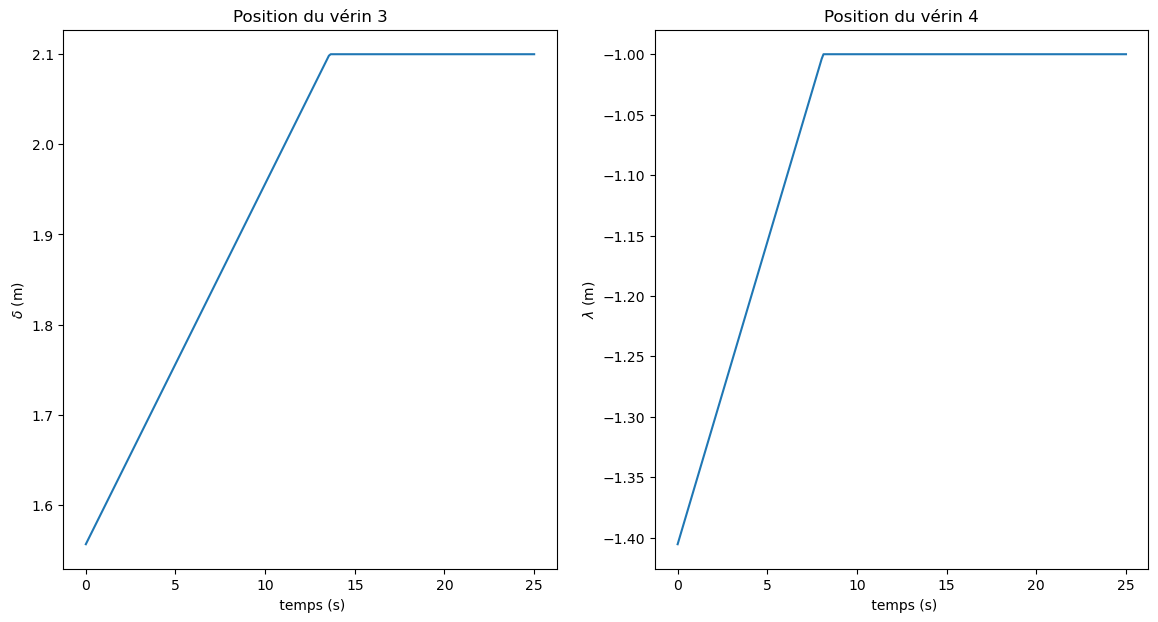

In [28]:
# tracé de l'évolution des positions des tiges des vérins dans la figure "fig_vérins"
fig_verins = plt.figure(figsize=(14, 7));
ax = fig_verins.add_subplot(1,2,1);
ax.plot(sol[:,0],sol[:,1]);
ax.set_xlabel(' temps (s)')
ax.set_ylabel(r'$ \delta $ (m)')
ax.set_title('Position du vérin 3')
bx = fig_verins.add_subplot(1,2,2);
bx.set_xlabel(' temps (s)')
bx.set_ylabel(r'$ \lambda $ (m)')
bx.set_title('Position du vérin 4')
bx.plot(sol[:,0],sol[:,2]);
# sauvegarde de la figure au format jpg
fig_verins.savefig('positions_vérins.jpg', dpi=300)

#### Tracé de l'évolution des angles d'orientations $ \psi_i $

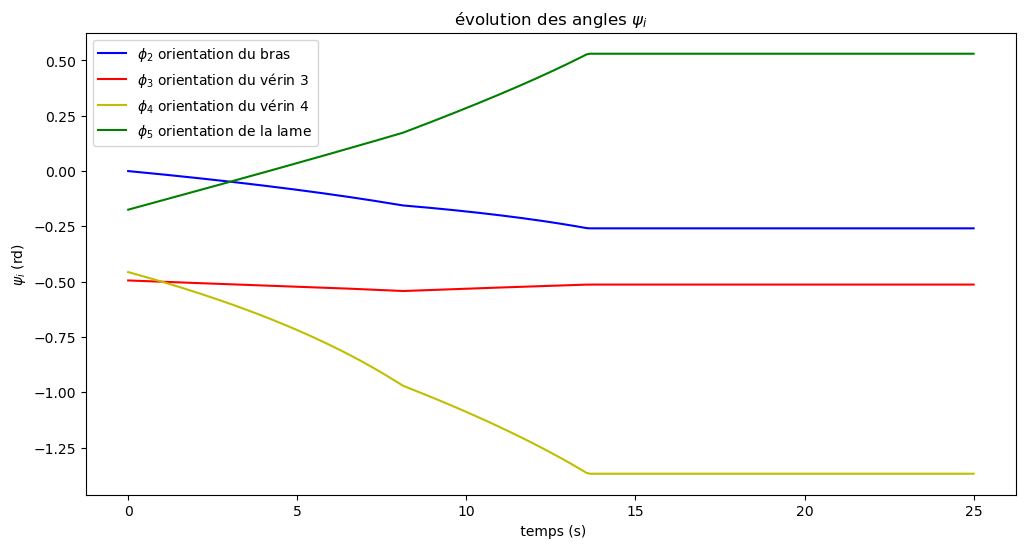

In [29]:
# tracé de l'évolutions des angles d'orientation dans la figure "fig_psi"
fig_psi, ax = plt.subplots(figsize=(12, 6))
ax.plot(sol[:,0],sol[:,3],'b', label = '$\phi_2$ orientation du bras');
ax.set_xlabel(' temps (s)')
ax.set_ylabel(r'$ \psi_i $ (rd)')
ax.set_title('évolution des angles $ \psi_i $')
ax.plot(sol[:,0],sol[:,4],'r', label = '$\phi_3 $ orientation du vérin 3');
ax.plot(sol[:,0],sol[:,5],'y', label = '$\phi_4$ orientation du vérin 4');
ax.plot(sol[:,0],sol[:,6],'g', label = '$\phi_5$ orientation de la lame');
ax.legend();
# sauvegarde de la figure 
fig_psi.savefig('orientation_pièces.jpg', dpi=300)

#### Tracé de la position initiale et finale du mécanisme

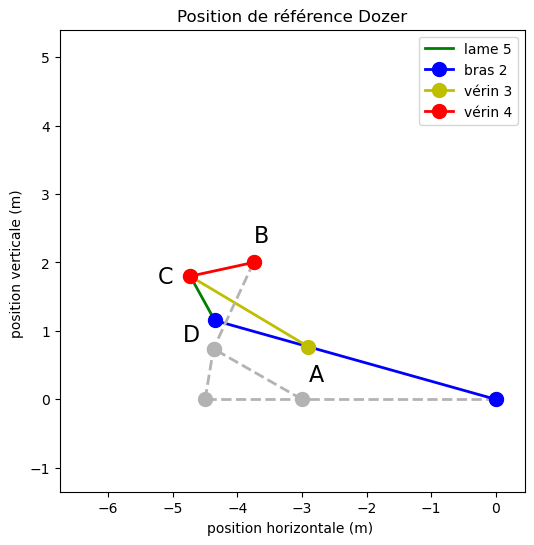

In [30]:
# la position initiale est déjà identifiée, il s'agit ici de définir uniquement la position finale de A, D et C
XA = a*np.cos(psi2); ZA = -a*np.sin(psi2)
XD = d*np.cos(psi2); ZD = -d*np.sin(psi2)
XC = a*np.cos(psi2) + delta_c*np.cos(psi3); ZC = -a*np.sin(psi2) - delta_c*np.sin(psi3)
#
# tracé des positions initiale et finale la figure fig_if
fig_if = plt.figure(figsize=(6, 6))
ax = fig_if.add_subplot(autoscale_on=False, xlim=(-1.5*d,0.1*d), ylim = (-0.3*d,1.2*d))
#
# position initiale et finale de la lame
ax.plot([-XD0,-XC0],[ZD0,ZC0],'0.7', lw=2, linestyle='--')
ax.plot([-XD,-XC],[ZD,ZC],'g-', lw=2, label = 'lame 5')
# position initiale et finale du bras
ax.plot([XO2,-XD0],[ZO2,ZD0],'0.7',marker='o', lw=2, ms=10, linestyle='--')
ax.plot([XO2,-XD],[ZO2,ZD],'b-',marker='o', lw=2, ms=10, label = 'bras 2')
# position initiale et finale du vérin 3
ax.plot([-XA0,-XC0],[ZA0,ZC0],'0.7',marker='o', lw=2, ms=10, linestyle='--')
ax.plot([-XA,-XC],[ZA,ZC],'y-',marker='o', lw=2, ms=10, label = 'vérin 3')
# position initiale et finale du vérin 4
ax.plot([-XB,-XC0],[ZB,ZC0],'0.7',marker='o', lw=2, ms=10, linestyle='--')
ax.plot([-XB,-XC],[ZB,ZC],'r-',marker='o', lw=2, ms=10, label = 'vérin 4')
#
ax.set_xlabel('position horizontale (m) ')
ax.set_ylabel('position verticale (m) ')
ax.set_title('Position de référence Dozer')
#
ax.legend()
#
ax.text(-XA, ZA-0.5, 'A', color = 'black', fontsize =16)
ax.text(-XB, ZB+0.3, 'B', color = 'black', fontsize =16)
ax.text(-XC-0.5, ZC-0.1, 'C', color = 'black', fontsize =16)
ax.text(-XD-0.5, ZD-0.3, 'D', color = 'black', fontsize =16)
# sauvegarde de la figure 
fig_if.savefig('positions_initiale_finale.jpg', dpi=300)

## E3 - Calcul des vitesses et accélérations angulaires 

In [15]:
# initialisation des vecteurs contenant les vitesses et les accélérations. 
V = np.zeros((ninc,4)); A = np.zeros((ninc,4))
#
# calcul des vitesses et des accélérations 
for j in range(ninc):
    if j == 0 or j == nd or j == nl:
        V[j,:] = (-3*sol[j, 3:7] + 4*sol[j+1, 3:7] - sol[j+2, 3:7])/(2*dt)
        A[j,:] = (2*sol[j, 3:7] - 5*sol[j+1, 3:7] + 4*sol[j+2, 3:7] - sol[j+3, 3:7])/(dt**2)
    elif j == ninc-1 or j == nd-1 or j == nl-1:
        V[j,:] = (3*sol[j, 3:7] - 4*sol[j-1, 3:7] + sol[j-2, 3:7])/(2*dt)
        A[j,:] = (2*sol[j, 3:7] - 5*sol[j-1, 3:7] + 4*sol[j-2, 3:7] - sol[j-3, 3:7])/(dt**2)
    else:
        V[j,:] = (sol[j+1, 3:7] - sol[j-1, 3:7])/(2*dt)
        A[j,:] = (sol[j-1, 3:7] - 2*sol[j, 3:7] + sol[j+1, 3:7])/(dt**2)

#### Tracé des vitesses angulaires

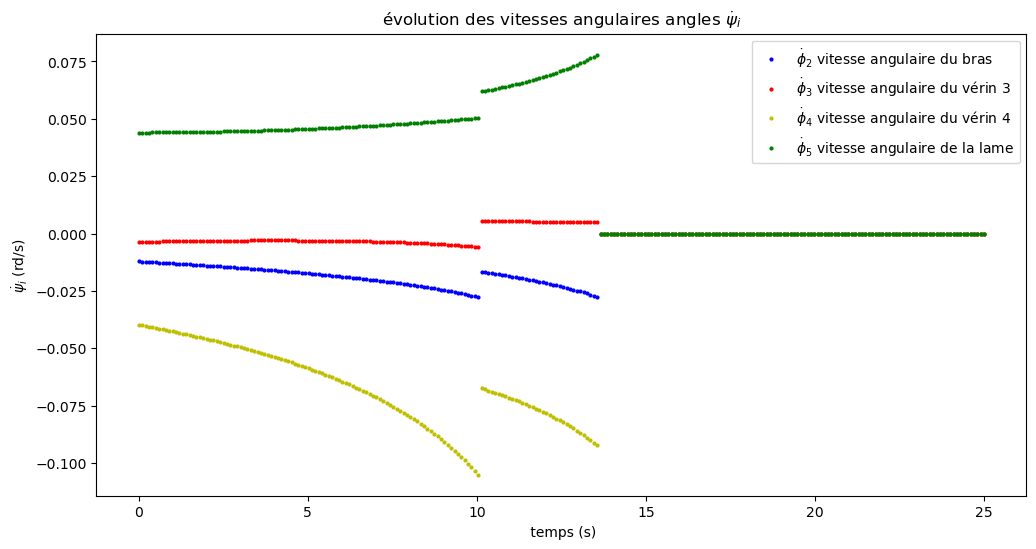

In [16]:
# tracé de l'évolutions des vitesses angulaires dans la figure fig_psip
fig_psip, ax = plt.subplots(figsize=(12, 6))
ax.plot(sol[:,0],V[:,0],'ob', label = '$\dot \phi_2$ vitesse angulaire du bras', ms=2)
ax.set_xlabel(' temps (s)')
ax.set_ylabel(r'$ \dot \psi_i $ (rd/s)')
ax.set_title('évolution des vitesses angulaires angles $ \dot \psi_i $')
ax.plot(sol[:,0],V[:,1],'or', label = '$\dot \phi_3 $ vitesse angulaire du vérin 3', ms=2)
ax.plot(sol[:,0],V[:,2],'oy', label = '$\dot \phi_4$ vitesse angulaire du vérin 4', ms=2)
ax.plot(sol[:,0],V[:,3],'og', label = '$\dot \phi_5$ vitesse angulaire de la lame', ms=2)
ax.legend();
# sauvegarde de la figure 
fig_psip.savefig('vitesses_angulaires_pièces.jpg', dpi=300)

#### Tracé des accélérations angulaires

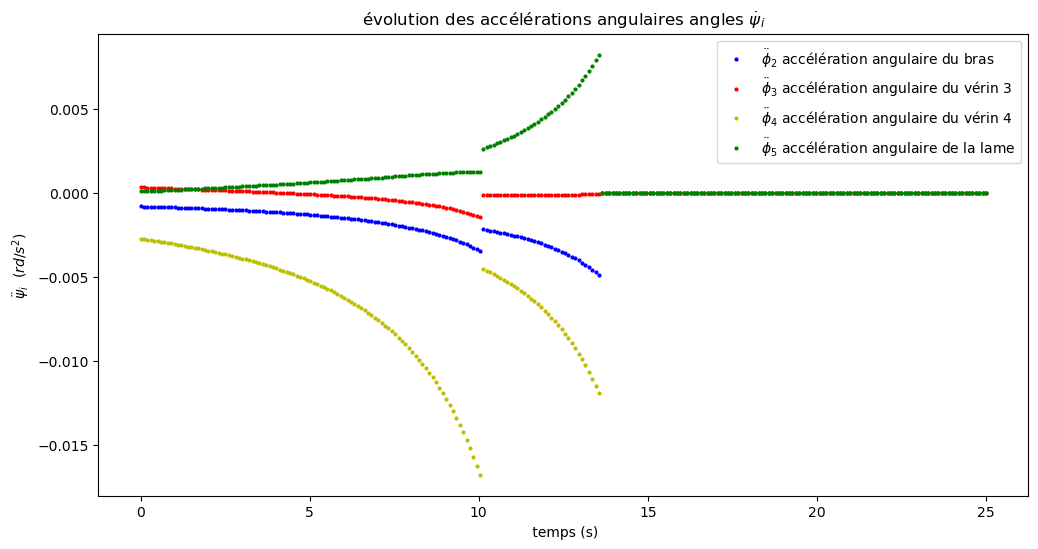

In [17]:
# tracé de l'évolutions des accélérations angulaires dans la figure fig_psipp
fig_psipp, ax = plt.subplots(figsize=(12, 6))
ax.plot(sol[:,0],A[:,0],'ob', label = '$\ddot \phi_2$ accélération angulaire du bras', ms=2)
ax.set_xlabel(' temps (s)')
ax.set_ylabel(r'$ \ddot \psi_i$  $ (rd/s^2)$')
ax.set_title('évolution des accélérations angulaires angles $ \dot \psi_i $')
ax.plot(sol[:,0],A[:,1],'or', label = '$\ddot \phi_3 $ accélération angulaire du vérin 3', ms=2)
ax.plot(sol[:,0],A[:,2],'oy', label = '$\ddot \phi_4$ accélération angulaire du vérin 4', ms=2)
ax.plot(sol[:,0],A[:,3],'og', label = '$\ddot \phi_5$ accélération angulaire de la lame', ms=2)
ax.legend();
# sauvegarde de la figure 
fig_psipp.savefig('accélérations_angulaires_pièces.jpg', dpi=300)

## E4 - Calcul des efforts développés par les vérins 

#### Masses et inerties des pièces mobiles

In [18]:
# masse m2 du bras et m5 de la lame (en kg), les masses des vérins sont négligées 
m2 = 532; m5 = 1050
# Moment d'inertie B2 du bras / (G2,y) et B5 de la lame / (G5,y) (kg.m^2)
B2 = 906.0; B5 = 247.0
# accélération de la pesanteur (m/s^2)
g = 9.81 

#### calcul des efforts ( $X_{35}$ , $Z_{45}$ ) exercés par les vérins 3 et 4 sur la lame 5

In [19]:
# sol contient [t, delta_c, lambda_c, psi2, psi3, psi4, psi5] 
# V contient [d(psi2)/dt, d(psi3)/dt, d(psi4)/dt, d(psi5)/dt]
# A contient [dd(psi2)/ddt, dd(psi3)/ddt, dd(psi4)/dt, dd(psi5)/ddt]
#
# Calcul de Z45
Az = (B5+m5*(b**2)/4)*A[:,3] + (B2+m2*(d**2)/4+m5*d**2)*A[:,0]
Bz = m5*d*(b/2)*((A[:,3] + A[:,0])*np.sin(sol[:,6]-sol[:,3]) + (V[:,3]**2 - V[:,0]**2)*np.cos(sol[:,6]-sol[:,3]))
Cz = (m5+m2/2)*g*d*np.cos(sol[:,3]) + m5*g*(b/2)*np.sin(sol[:,6])
Dz = d*np.cos(sol[:,5]-sol[:,3]) + b*np.sin(sol[:,6]-sol[:,5])
Z45 = -(Az + Bz - Cz)/Dz
Z45S = Cz/Dz
# Calcul de X35
Ax = (B5+m5*(b**2)/4)*A[:,3]
Bx = m5*d*(b/2)*(A[:,0]*np.sin(sol[:,6]-sol[:,3]) - (V[:,0]**2)*np.cos(sol[:,6]-sol[:,3]))
Cx = m5*g*(b/2)*np.sin(sol[:,6])
Dx = b*np.sin(sol[:,5]-sol[:,6])
Ex = b*np.cos(sol[:,6]-sol[:,4])
X35 = (Ax + Bx - Cx - Z45*Dx)/Ex
X35S = (-Cx - Z45S*Dx)/Ex

#### Tracé des efforts développés par le vérin 4 sur la lame 5

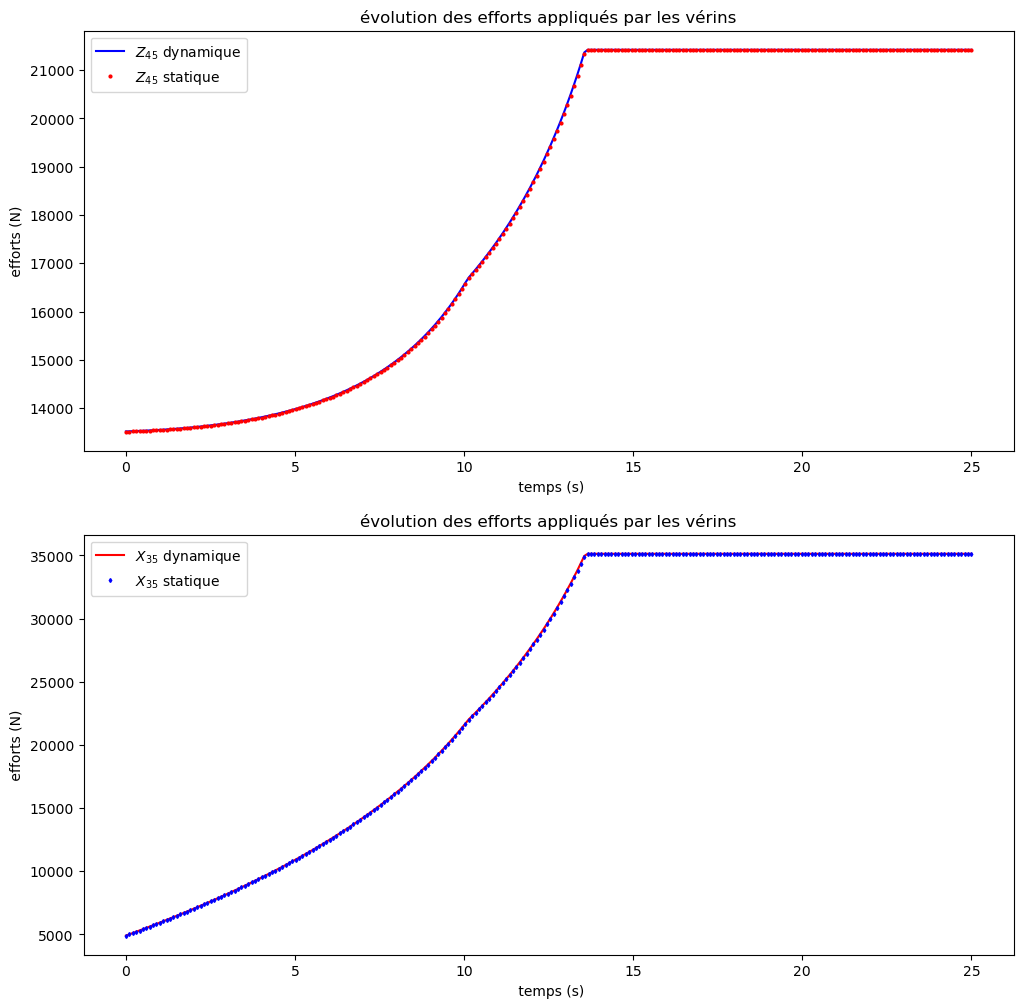

In [20]:
# tracé de l'évolutions des efforts dans la figure fig_eff
fig_eff = plt.figure(figsize=(12, 12))
ax = fig_eff.add_subplot(2,1,1)
ax.plot(sol[:,0],Z45, 'b',label = '$ Z_{45} $ dynamique', ms=2)
ax.plot(sol[:,0],Z45S,'or', label = '$ Z_{45} $ statique', ms=2)
ax.set_xlabel(' temps (s)')
ax.set_ylabel(' efforts (N) ')
ax.set_title('évolution des efforts appliqués par les vérins')
ax.legend();
bx = fig_eff.add_subplot(2,1,2)
bx.plot(sol[:,0],X35, 'r', label = '$ X_{35} $ dynamique', ms=2)
bx.plot(sol[:,0],X35S,'bd', label = '$ X_{35} $ statique', ms=2)
bx.set_xlabel(' temps (s)')
bx.set_ylabel(' efforts (N) ')
bx.set_title('évolution des efforts appliqués par les vérins')
bx.legend();
# sauvegarde de la figure 
fig_eff.savefig('Effort_Z45.jpg', bbox_inches = transforms.Bbox([[0, 5.9], [12, 11]]), dpi=300)
fig_eff.savefig('Effort_X35.jpg', bbox_inches = transforms.Bbox([[0, 1], [12, 6]]), dpi=300)

## E5 - Etude de la phase d'amortissement de fin de course des vérins 

#### Données caractéristiques du circuit hydraulique d'amortissement de fin de courses du vérin 4

In [37]:
# masse volumique de l'huile rho_h (kg/m^3)
rho_h = 900
# Section annulaire de le chambre du vérin coté amortisseur Sam, coté pression motrice Sa et totale S (m^2)
Sam = 1.18E-3; Sa = 2.56E-3; S = 5.03E-3
#
# section s de la restriction de débit du régulateur (m^2)

s = 1.5E-6

# Coefficient de perte de charge singulière Cs du régulateur de débit (sans unité)
Cs = 0.7
# longueur de la course d'amortissement C_am (m) 
C_am = 5E-2
# temps de simulation tam (s) de la phase d'amortissement et nombre de point d'intégration associé n_am
t_am = 2; n_am = 100

#### Définition de l'équation différentielle à résoudre 

In [38]:
# Identification de la position angulaire des solides lors de l'arrivée en butée du vérin 4 donnée par l'indice nl
psi2a = sol[nl,3]; psi3a = sol[nl-1,4]; psi4a = sol[nl-1,5]; psi5a = sol[nl-1,6]
#
# Calcul des termes A, C et Is présents dans l'équation différentielle
A = (m5 + m2/2)*g*d*np.cos(psi2a) + m5*g*(b/2)*np.sin(psi5a)
C = d*np.cos(psi4a-psi2a) + b*np.sin(psi5a-psi4a)
Is = B5 + B2 + m5*(d**2+(b**2)/4) + m2*(d**2)/4 + m5*b*d*np.sin(psi5a-psi2a)
#
# Calcul de la pression motrice Pt associée à la vitesse Vl de la tige en suppossant un écoulement libre (avant
# amortissement) au travers d'une section sl de 1 cm^2 
sl = 1E-4; Pt = (rho_h*(S**3)*(Vl**2)/(2*(Cs**2)*(sl**2)) + A/C)/Sa

def Mouvement_tige(t,X,A,C,Is,rho_h,Sam,Cs,s,Sa):
    x1, x2 = X
    dx1dt = x2
    dx2dt = (Pt*Sa - A/C - (rho_h*(Sam**3)/(2*Cs**2*s**2))*dx1dt**2)/(Is/(C**2))
    return [dx1dt, dx2dt]

#### Résolution de l'équation de mouvement de la tige du vérin 4 en fin de course

In [39]:
# position la du vérin 4 en début de phase d'amortissement 
la = sol[nl,2] - C_am
# conditiona initiales (position et vitesse) au début de la phase d'amortissement
x0=[la, Vl];
#
# vecteur temps de simulation
t_balayage = np.linspace(0.0, t_am, n_am)
#
# test du signe de la vitesse du vérin, le modèle ayant été construit Vl > 0 
if Vl > 0 :
    p=(A,C,Is,rho_h,Sam,Cs,s,Sa)
    sol_am=solve_ivp(Mouvement_tige, [t0,t_am], x0, method='RK45', args = p, t_eval=t_balayage)
else:
   print("la vitesse Vl doit être positive pour effectuer cette simulation, modifier la vitesse")  
#
# extraction de la vitesse en fin d'amortissement simulé 
print(f"la vitesse de la tige en fin d'amortissement est {sol_am.y[1][n_am-1]*1e3:.1f} mm/s")

la vitesse de la tige en fin d'amortissement est 6.6 mm/s


#### Tracé de la position et de la vitesse de la tige pendant la phase d'amortissement

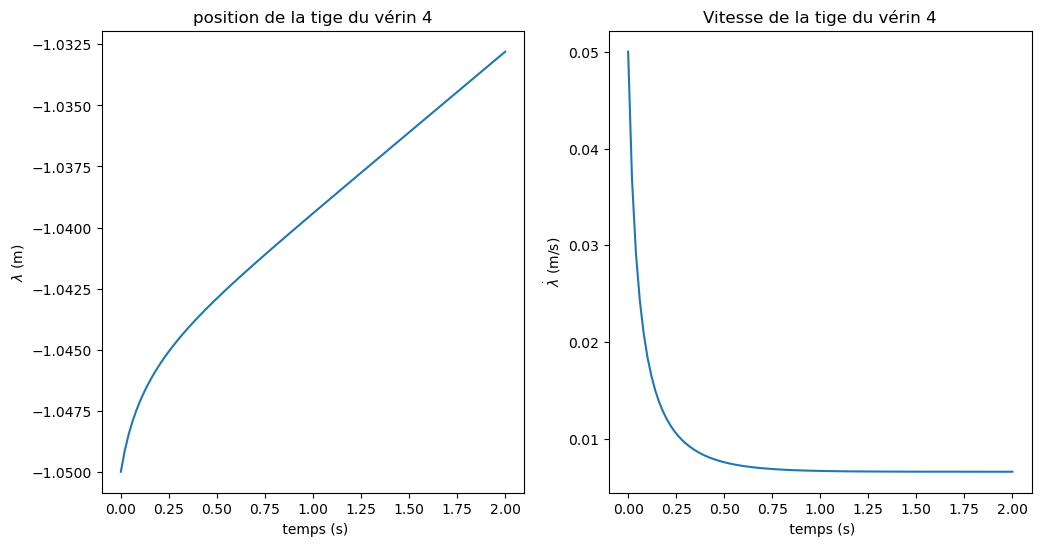

In [40]:
# tracé de l'évolution de la position et de la vitesse de la tige dans la figure fig_am
fig_am = plt.figure(figsize=(12, 6)) 
ax = fig_am.add_subplot(1,2,1);
ax.plot(sol_am.t,sol_am.y[0]);
ax.set_xlabel(' temps (s)');
ax.set_ylabel(r'$ \lambda $ (m)');
ax.set_title('position de la tige du vérin 4');
bx = fig_am.add_subplot(1,2,2);
bx.plot(sol_am.t,sol_am.y[1]);
bx.set_xlabel(' temps (s)');
bx.set_ylabel(r'$ \dot\lambda $ (m/s)');
bx.set_title('Vitesse de la tige du vérin 4');
# sauvegarde de la figure au format jpg
fig_am.savefig('position_et_vitesse_amortissement.jpg', dpi=300)